# 引入仓库及常量
---

In [2]:
import tools
import numpy as np 
import plotly 
import plotly.express as px

PATH = tools.Get_PATH()
device = tools.try_gpu()

# 控制变量
---

In [2]:
Weigth_Decay = 0
Kernel_Size = 5
Batch_Size = 4
Num_Steps = 5
Model = "LSTM"

Use_Random_Iter = True
Dec_Kernel_Size = Kernel_Size
Num_Layers = 3
Hidden_Dim = 64
Learning_Rate = 0.0005
Num_Epochs = 200

Input_Dim = 30

# 引入 DataLoader
---

In [3]:
train_data = np.load('./Data/train_dataset.npy')
train_iter = tools.SeqDataLoader(train_data, batch_size=Batch_Size, num_steps=Num_Steps, use_random_iter=Use_Random_Iter, path=PATH, exceptlist=[87])

test_data = np.load('./Data/test_dataset.npy')
test_iter = tools.SeqDataLoader(test_data, batch_size=Batch_Size, num_steps=Num_Steps, use_random_iter=Use_Random_Iter)

train_channel = train_data.shape[1]
test_channel = test_data.shape[1]

assert train_channel == test_channel == Input_Dim

# 引入模型
---

In [4]:
if Model == "GRU":
    from nets import ConvGRU as net

elif Model == "LSTM":
    from nets import ConvLSTM as net

else:
    raise NotImplementedError()

RNN = net(input_dim=Input_Dim, hidden_dim=Hidden_Dim, kernel_size=Kernel_Size, dec_kernel_size=Dec_Kernel_Size,
            num_layers=Num_Layers, batch_first=True, bias=True).to(device)

RNN.summary(PATH)

# 训练模型
---

MSE: 4.738873; 15.3 pictures/sec on cuda:0


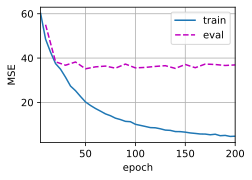

In [5]:
tools.train(RNN, train_iter, Learning_Rate, Num_Epochs, device, use_random_iter=Use_Random_Iter, weigth_decay=Weigth_Decay, path=PATH, eval=test_iter)

# 模型保存与加载
---

In [1]:
# tools.save(RNN, PATH)
tools.load(RNN, PATH, device)

NameError: name 'tools' is not defined

# 模型评估
---

In [7]:
MSE = tools.evaluate(RNN, test_iter, device)

# with open(PATH + "/log.txt","a") as f:
#     f.write("\n-----------TEST_RESULT-----------\n")
#     f.write("MSE:\t" + str(MSE) + "\n")

print("MSE on test dataset:\t", MSE)

MSE on test dataset:	 34.46614354451497


# 绘图
---

In [8]:
test_data_iter = iter(test_iter)

In [9]:
X, Y = next(test_data_iter)

In [10]:
fig = px.imshow(np.array(Y[0]))
fig.show()
plotly.offline.plot(fig, filename=PATH + '/test_groundture.html', image='svg')

'Models/2022-05-01_01-10-40/test_groundture.html'

In [11]:
pred, _ = RNN(X.to(device))
pred = pred.cpu().detach().numpy()
fig = px.imshow(pred[0])
fig.show()
plotly.offline.plot(fig, filename=PATH + '/test_predictions.html', image='svg')

'Models/2022-05-01_01-10-40/test_predictions.html'

In [12]:
(abs(pred - Y.numpy())).mean()

2.6328654